## <font color=blue> Проектная работа №2 </font>
## <font color=blue> Автор: Владимир Черябкин </font>


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# для использования метода .describe() необходимо выделить столбцы с чсиленными значениями и с остальными (категориальными) типами данных. Т.к.в источнике есть столбцы с разными типами данных
categorical_columns = (
    [c for c in data.columns 
    if data[c].dtype.name == 'object' or data[c].dtype.name == 'bool']
)
data[categorical_columns].describe()

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


In [5]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data[numerical_columns].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# циклом считаем и выводим количество пустых значений в столбцах таблицы
for c in data.columns:
    print('Количество пустых значений '+ c + ' = {}'.format(data[c].isnull().sum()))
    print('  и это составляет {:.1%} от всех значений'.format(data[c].isnull().sum()/len(data[c])))
    print()

Количество пустых значений total_images = 0
  и это составляет 0.0% от всех значений

Количество пустых значений last_price = 0
  и это составляет 0.0% от всех значений

Количество пустых значений total_area = 0
  и это составляет 0.0% от всех значений

Количество пустых значений first_day_exposition = 0
  и это составляет 0.0% от всех значений

Количество пустых значений rooms = 0
  и это составляет 0.0% от всех значений

Количество пустых значений ceiling_height = 9195
  и это составляет 38.8% от всех значений

Количество пустых значений floors_total = 86
  и это составляет 0.4% от всех значений

Количество пустых значений living_area = 1903
  и это составляет 8.0% от всех значений

Количество пустых значений floor = 0
  и это составляет 0.0% от всех значений

Количество пустых значений is_apartment = 20924
  и это составляет 88.3% от всех значений

Количество пустых значений studio = 0
  и это составляет 0.0% от всех значений

Количество пустых значений open_plan = 0
  и это составл

<div style="border:solid green 4px; padding: 20px">Не очень наглядно получилось.</div>

In [7]:
# Проверяем дубли
#data[data.duplicated(keep=False)]
data.duplicated().sum()

0

### Вывод

### Содержание таблицы
#### Наименование полей
1. **total_images** — число фотографий квартиры в объявлении
1. **last_price** — цена на момент снятия с публикации
1. **total_area** — площадь квартиры в квадратных метрах (м²)
1. **first_day_exposition** — дата публикации
1. **rooms** — число комнат
1. **ceiling_height** — высота потолков (м)
1. **floors_total** — всего этажей в доме
1. **living_area** — жилая площадь в квадратных метрах(м²)
1. **floor** — этаж
1. **is_apartment** — апартаменты (булев тип)
1. **studio** — квартира-студия (булев тип)
1. **open_plan** — свободная планировка (булев тип)
1. **kitchen_area** — площадь кухни в квадратных метрах (м²)
1. **balcony** — число балконов
1. **locality_name** — название населённого пункта
1. **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
1. **cityCenters_nearest** — расстояние до центра города (м)
1. **parks_around3000** — число парков в радиусе 3 км
1. **parks_nearest** — расстояние до ближайшего парка (м)
1. **ponds_around3000** — число водоёмов в радиусе 3 км
1. **ponds_nearest** — расстояние до ближайшего водоёма (м)
1. **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

#### Количество пустых значений
1. ceiling_height - `9195`, что составляет `38,8%` от всех записей в таблице
1. floors_total - `86`, что составляет `0.4%` от всех записей в таблице
1. living_area - `1903`, что составляет `8%` от всех записей в таблице
1. is_apartment - `20924`, что составляет `88.3%` от всех записей в таблице
1. kitchen_area - `2278`, что составляет `9.6%` от всех записей в таблице
1. balcony - `11519`, что составляет `48.6%` от всех записей в таблице
1. locality_name - `49`, что составляет `0.2%` от всех записей в таблице
1. airports_nearest - `5542`, что составляет `23.4%` от всех записей в таблице
1. cityCenters_nearest - `5519`, что составляет `23.3%` от всех записей в таблице
1. parks_around3000 - `5518`, что составляет `23.3%` от всех записей в таблице
1. parks_nearest - `15620`, что составляет `65.9%` от всех записей в таблице
1. ponds_around3000 - `5518`, что составляет `23.3%` от всех записей в таблице
1. ponds_nearest - `14589`, что составляет `61.6%` от всех записей в таблице
1. days_exposition - `3181`, что составляет `13.4%` от всех записей в таблице

#### Количество дублей
Дублей нет

### Шаг 2. Предобработка данных

#### Изучение пропущенных значений

1. ceiling_height - `9195` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитывать
1. floors_total - `86` - Там, где не указано ставим среднее, т.к. среднее по столбцу `floor` при `floors_total = NaN` значения около 10 и среднее по `floors_total` так же около 10
1. living_area - `1903` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитыват
1. is_apartment - `20924` - Там, где не указано ставим False, т.к. логично, что люди не поставили этот атрибут, если квартаира не является аппартаментами
1. kitchen_area - `2278` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитывать
1. balcony - `11519` - Там, где не указано ставим "0", т.к. логично, что люди не поставили этот атрибут, если в квартаире нет балконов
1. locality_name - `49` - Оставляем пустыми, т.к. название населенного пункта сложно математически высчитать
1. airports_nearest - `5542` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитывать
1. cityCenters_nearest - `5519` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитывать
1. parks_around3000 - `5518` - Там, где не указано ставим "0", значит парка рядом нет, и люди просто его не указывали
1. parks_nearest - `15620` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитывать
1. ponds_around3000 - `5518` - Там, где не указано ставим "0", значит пруда рядом нет, и люди просто его не указывали
1. ponds_nearest - `14589` - Там, где не указано ставим среднее, т.к. верхний квартиль близок к медиане, значит большие значения не являются вбросом, и их можно учитывать
1. days_exposition - `3181` - Там, где не указано ставим медиану, т.к. среднее в два раза больше медиан, значит большие значения являются вбросом, и их можно не учитывать

In [8]:
# заполняем пропуски в соответсвии с описанием выше
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())
data['living_area'] = data['living_area'].fillna(data['living_area'].mean())
data['is_apartment'] = data['is_apartment'].fillna('False')
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())
data['balcony'] = data['balcony'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean())
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data.info()
data.head(10).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3

,0,1,2,3,4,5,6,7,8,9
total_images,20,7,10,0,2,10,6,5,20,18
last_price,1.3e+07,3.35e+06,5.196e+06,6.49e+07,1e+07,2.89e+06,3.7e+06,7.915e+06,2.9e+06,5.4e+06
total_area,108,40.4,56,159,100,30.4,37.3,71.6,33.16,61
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3
ceiling_height,2.7,2.7715,2.7715,2.7715,3.03,2.7715,2.7715,2.7715,2.7715,2.5
floors_total,16,11,5,14,14,12,26,24,27,9
living_area,51,18.6,34.3,34.4579,32,14.4,10.6,34.4579,15.43,43.6
floor,8,1,4,9,13,5,6,22,26,7
is_apartment,False,False,False,False,False,False,False,False,False,False


#### Приведение данных к нужным типам

В перечисленных ниже столбцах необходимо поменять тип данных   
last_price             `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
first_day_exposition   object - меняем на дату, часы и минуты здесь не важны + в таблице указановремя 00:00:00
floors_total           `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
balcony                `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
airports_nearest       `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых километров округлить  
cityCenters_nearest    `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
parks_around3000       `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
parks_nearest          `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
ponds_around3000       `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
ponds_nearest          `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  
days_exposition        `float64` - меняем на `int64` - здесь не нужна точность до десятых, удобнее до целых чисел округлить  

In [9]:
# меняем типы данных в соответствии с описанием выше
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = (data['airports_nearest']/1000).astype('int')
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18,16,1,482,2,755,95
1,7,3350000,40.40,2018-12-04,1,2.771499,11,18.600000,1,False,...,11.000000,2,посёлок Шушары,12,18,0,490,0,517,81
2,10,5196000,56.00,2015-08-20,2,2.771499,5,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21,13,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.771499,14,34.457852,9,False,...,10.569807,0,Санкт-Петербург,28,6,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31,8,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,2.771499,12,14.400000,5,False,...,9.100000,0,городской посёлок Янино-1,28,14,0,490,0,517,55
6,6,3700000,37.30,2017-11-02,1,2.771499,26,10.600000,6,False,...,14.400000,1,посёлок Парголово,52,19,0,490,0,517,155
7,5,7915000,71.60,2019-04-18,2,2.771499,24,34.457852,22,False,...,18.900000,2,Санкт-Петербург,23,11,0,490,0,517,95
8,20,2900000,33.16,2018-05-23,1,2.771499,27,15.430000,26,False,...,8.810000,0,посёлок Мурино,28,14,0,490,0,517,189
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.600000,7,False,...,6.500000,2,Санкт-Петербург,50,15,0,490,0,517,289


### Шаг 3. Посчитайте и добавьте в таблицу

#### Цена квадратного метра

Цену квадратного метра `price_of_sq_meter` получим поделив стоимость квартиры на общую площадь. Для удобства приведем результат к целочисленному значению.

In [10]:
data['price_of_sq_meter'] = (data['last_price']/data['total_area']).astype('int')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_sq_meter
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,...,0,Санкт-Петербург,18,16,1,482,2,755,95,120370
1,7,3350000,40.40,2018-12-04,1,2.771499,11,18.600000,1,False,...,2,посёлок Шушары,12,18,0,490,0,517,81,82920
2,10,5196000,56.00,2015-08-20,2,2.771499,5,34.300000,4,False,...,0,Санкт-Петербург,21,13,1,90,2,574,558,92785
3,0,64900000,159.00,2015-07-24,3,2.771499,14,34.457852,9,False,...,0,Санкт-Петербург,28,6,2,84,3,234,424,408176
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.000000,13,False,...,0,Санкт-Петербург,31,8,2,112,1,48,121,100000
5,10,2890000,30.40,2018-09-10,1,2.771499,12,14.400000,5,False,...,0,городской посёлок Янино-1,28,14,0,490,0,517,55,95065
6,6,3700000,37.30,2017-11-02,1,2.771499,26,10.600000,6,False,...,1,посёлок Парголово,52,19,0,490,0,517,155,99195
7,5,7915000,71.60,2019-04-18,2,2.771499,24,34.457852,22,False,...,2,Санкт-Петербург,23,11,0,490,0,517,95,110544
8,20,2900000,33.16,2018-05-23,1,2.771499,27,15.430000,26,False,...,0,посёлок Мурино,28,14,0,490,0,517,189,87454
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.600000,7,False,...,2,Санкт-Петербург,50,15,0,490,0,517,289,88524


#### День недели, месяц и год публикации объявления

Для новых данных добавим три соответсвующих столбца `weekday`, `month`, `year`

In [11]:
data['weekday'] = data['first_day_exposition'].dt.weekday_name
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_sq_meter,weekday,month,year
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,...,16,1,482,2,755,95,120370,Thursday,3,2019
1,7,3350000,40.40,2018-12-04,1,2.771499,11,18.600000,1,False,...,18,0,490,0,517,81,82920,Tuesday,12,2018
2,10,5196000,56.00,2015-08-20,2,2.771499,5,34.300000,4,False,...,13,1,90,2,574,558,92785,Thursday,8,2015
3,0,64900000,159.00,2015-07-24,3,2.771499,14,34.457852,9,False,...,6,2,84,3,234,424,408176,Friday,7,2015
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.000000,13,False,...,8,2,112,1,48,121,100000,Tuesday,6,2018
5,10,2890000,30.40,2018-09-10,1,2.771499,12,14.400000,5,False,...,14,0,490,0,517,55,95065,Monday,9,2018
6,6,3700000,37.30,2017-11-02,1,2.771499,26,10.600000,6,False,...,19,0,490,0,517,155,99195,Thursday,11,2017
7,5,7915000,71.60,2019-04-18,2,2.771499,24,34.457852,22,False,...,11,0,490,0,517,95,110544,Thursday,4,2019
8,20,2900000,33.16,2018-05-23,1,2.771499,27,15.430000,26,False,...,14,0,490,0,517,189,87454,Wednesday,5,2018
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.600000,7,False,...,15,0,490,0,517,289,88524,Sunday,2,2017


#### Этаж квартиры (варианты — первый, последний, другой)

Используем цикл для перебора всех строк и простановки соответсвующего значения в новом столбце `flat_floor`

In [12]:
def flat_floor(row):
   floor = row['floor']
   floors_total = row['floors_total']
   if floor == 1:
       return 'первый'
   if floors_total == 1:
       return 'первый'
   if floor == floors_total:
       return 'последний'
   return 'другой'
data['flat_floor'] = data.apply(flat_floor, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_sq_meter,weekday,month,year,flat_floor
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,...,1,482,2,755,95,120370,Thursday,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.771499,11,18.600000,1,False,...,0,490,0,517,81,82920,Tuesday,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.771499,5,34.300000,4,False,...,1,90,2,574,558,92785,Thursday,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.771499,14,34.457852,9,False,...,2,84,3,234,424,408176,Friday,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.000000,13,False,...,2,112,1,48,121,100000,Tuesday,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.771499,12,14.400000,5,False,...,0,490,0,517,55,95065,Monday,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.771499,26,10.600000,6,False,...,0,490,0,517,155,99195,Thursday,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.771499,24,34.457852,22,False,...,0,490,0,517,95,110544,Thursday,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.771499,27,15.430000,26,False,...,0,490,0,517,189,87454,Wednesday,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.600000,7,False,...,0,490,0,517,289,88524,Sunday,2,2017,другой


<div style="border:solid green 4px; padding: 20px">Хорошо.</div>

#### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Соотношение жилой и общей площади запишем в столбце `living_to_total`.   
Отношение площади кухни к общей запишем в столбце `kitchen_to_total`. 

In [13]:
data['living_to_total'] = data['living_area']/data['total_area']
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_of_sq_meter,weekday,month,year,flat_floor,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.000000,8,False,...,2,755,95,120370,Thursday,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.771499,11,18.600000,1,False,...,0,517,81,82920,Tuesday,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.771499,5,34.300000,4,False,...,2,574,558,92785,Thursday,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.771499,14,34.457852,9,False,...,3,234,424,408176,Friday,7,2015,другой,0.216716,0.066477
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.000000,13,False,...,1,48,121,100000,Tuesday,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.771499,12,14.400000,5,False,...,0,517,55,95065,Monday,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.771499,26,10.600000,6,False,...,0,517,155,99195,Thursday,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.771499,24,34.457852,22,False,...,0,517,95,110544,Thursday,4,2019,другой,0.481255,0.263966
8,20,2900000,33.16,2018-05-23,1,2.771499,27,15.430000,26,False,...,0,517,189,87454,Wednesday,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.600000,7,False,...,0,517,289,88524,Sunday,2,2017,другой,0.714754,0.106557


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [14]:
import matplotlib.pyplot as plt

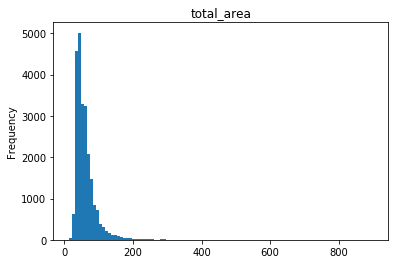

In [15]:
# гистограмма для площади
data['total_area'].plot(kind = 'hist', bins = 100, title = 'total_area')#, range = (0, 200))

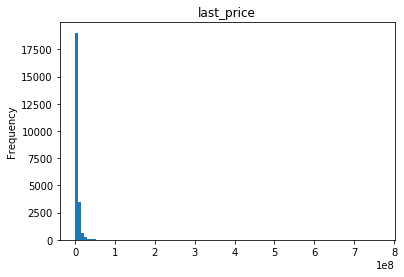

In [16]:
# гистограмма для цены
data['last_price'].plot(kind = 'hist', bins = 100, title = 'last_price')#, range = (0, 30000000))

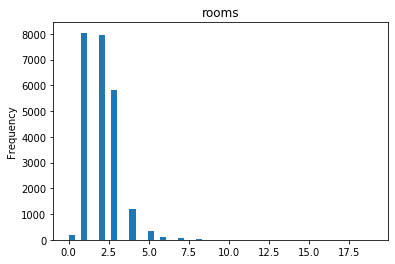

In [17]:
# гистограмма для числа комнат
data['rooms'].plot(kind = 'hist', bins = 50, title = 'rooms')#, range = (0, 10))

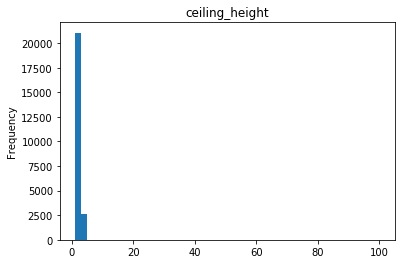

In [18]:
# гистограмма для высоты потолков
data['ceiling_height'].plot(kind = 'hist', bins = 50, title = 'ceiling_height')#, range = (2, 4))

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Строим гистограмму для времени продажи квартиры

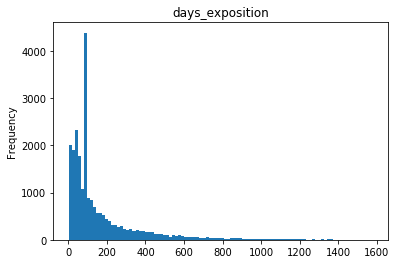

In [19]:
data['days_exposition'].plot(kind = 'hist', bins = 100, title = 'days_exposition')

<div style="border:solid green 4px; padding: 20px">А что это за палка (в районе 100 дней)?</div>

<div style="border:solid purple 2px; padding: 10px">Это 3245 значений с длительностью продажи "95 дней", а на гистограмме она выше 4000 из-за того, что в корзину попадают рядом стоящие значения и складываются с ним</div>

In [20]:
data['days_exposition'].value_counts()

95      3245
45       880
60       538
7        234
30       208
        ... 
807        1
871        1
951        1
999        1
1223       1
Name: days_exposition, Length: 1141, dtype: int64

Ищем среднее

In [21]:
print(data['days_exposition'].mean())

169.36022616988058


Ищем медиану

In [22]:
print(data['days_exposition'].median())

95.0


### Вывод

Обычно продажа занимает 95 дней (видно, что на гистограмме это значение встречается сильно чаще остальных + это значение соответсвует медиане). Среднее нельзя брать, т.к. есть продажи по несколько лет, и они влияют на среднее.  
Есть продажи квартиры за 1 день - это можно считать очень быстро  
В целом можно считать продажу быстрой по верхнему квартилю - до 45 дней  
Долгой продажей можно считать длительность дольше верхнего квартиля - больше 232 дней (почти год)

#### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

##### Уберем редкие и выбивающиеся значения из общей площади

In [23]:
data.query('total_area > 300')['total_area'].describe()

count     61.000000
mean     408.188197
std      106.318508
min      301.900000
25%      336.000000
50%      374.600000
75%      460.800000
max      900.000000
Name: total_area, dtype: float64

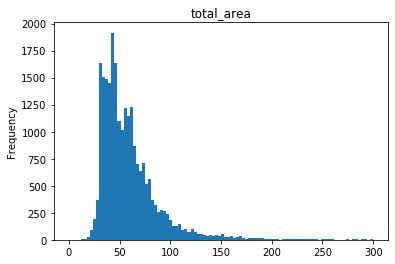

In [24]:
data['total_area'].plot(kind = 'hist', bins = 100, title = 'total_area', range = (0, 300))

### Вывод

Из первой гистаграммы видно, что в районе 300 кв.м. практически нет значений. Проверкой по условию > 300 получаем 61 предложение из 23699. Соответсвенно их можно смело убрать для дальнейшего анализа.  
В целом гистограмма похожа на распределение Пуассона - есть явные лидеры по продажам (от 40 до 60 кв.м.) и в дальнейшем чем больше квартира, тем меньше предложений на рынке

<div style="border:solid green 4px; padding: 20px">Больше признаков скошенного нормального распределения, чем Пуассона.</div>

##### Уберем редкие и выбивающиеся значения из цены

In [25]:
data.query('last_price > 30000000')['last_price'].describe()

count    3.160000e+02
mean     6.562297e+07
std      6.446523e+07
min      3.005000e+07
25%      3.600000e+07
50%      4.595000e+07
75%      6.800000e+07
max      7.630000e+08
Name: last_price, dtype: float64

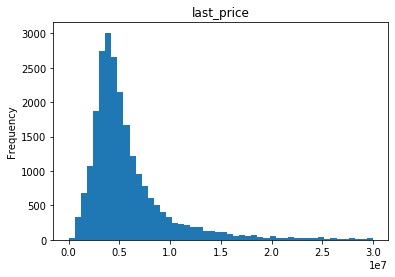

In [26]:
data['last_price'].plot(kind = 'hist', bins = 50, title = 'last_price', range = (0, 30000000))

### Вывод

Из первой гистаграммы видно, что в районе 10 млн практически нет значений. Проверкой по условию > 10 млн получаем почти 3000 значений. Увеличим условие: > 30 млн получим всего 316 значеий из 23699. Соответсвенно их можно смело убрать для дальнейшего анализа.
В целом гистограмма похожа на распределение Пуассона - есть явные лидеры по стоимости (от 4 до 6 млн) и в дальнейшем чем дороже цена квартиры, тем меньше предложений на рынке

##### Уберем редкие и выбивающиеся значения из количества комнат

In [27]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

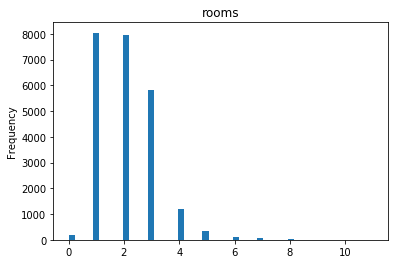

In [28]:
data['rooms'].plot(kind = 'hist', bins = 50, title = 'rooms', range = (0, 11))

### Вывод

"Вечные лидеры" - одно- и двухкомнатные квартиры   
Ничего убирать из статистики не требуется

##### Уберем редкие и выбивающиеся значения из высоты потолков

In [29]:
data.query('ceiling_height > 10')['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
22.6     1
10.3     1
100.0    1
27.5     1
20.0     1
14.0     1
26.0     1
24.0     1
Name: ceiling_height, dtype: int64

In [30]:
data.query('ceiling_height < 2')['ceiling_height'].value_counts()

1.20    1
1.00    1
1.75    1
Name: ceiling_height, dtype: int64

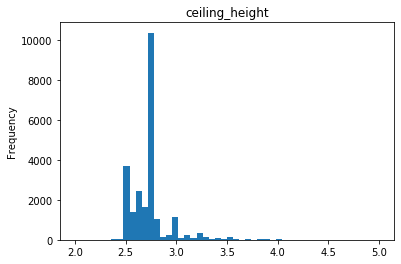

In [31]:
data['ceiling_height'].plot(kind = 'hist', bins = 50, title = 'ceiling_height', range = (2, 5))

### Вывод

Высота потолков требует отчистки:   
Есть потолки выше 10 метров - это подойдет больше нежилим помещениям (производствам и т.д.).  
Есть вообще 100 метров. Наверно ошиблись последним нулем...
Ну и есть высота менее 2-х метров.  
Возможно какое старое жилье, или опять ошиблись

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

##### Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра

In [32]:
# вспомним что у нас в данных
data.info()
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_of_sq_meter,weekday,month,year,flat_floor,living_to_total,kitchen_to_total
23689,13,3550000,35.30,2018-02-28,1,2.860000,15,16.300000,4,False,...,2,652,29,100566,Wednesday,2,2018,другой,0.461756,0.257790
23690,3,5500000,52.00,2018-07-19,2,2.771499,5,31.000000,2,False,...,0,517,15,105769,Thursday,7,2018,другой,0.596154,0.115385
23691,11,9470000,72.90,2016-10-13,2,2.750000,25,40.300000,7,False,...,1,806,519,129903,Thursday,10,2016,другой,0.552812,0.145405
23692,2,1350000,30.00,2017-07-07,1,2.771499,5,17.500000,4,False,...,0,517,413,45000,Friday,7,2017,другой,0.583333,0.200000
23693,9,4600000,62.40,2016-08-05,3,2.600000,9,40.000000,8,False,...,1,675,239,73717,Friday,8,2016,другой,0.641026,0.128205
23694,9,9700000,133.81,2017-03-21,3,3.700000,5,73.300000,3,False,...,3,381,95,72490,Tuesday,3,2017,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,2.771499,5,38.000000,4,False,...,0,517,45,52542,Monday,1,2018,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,2.771499,3,29.700000,1,False,...,0,517,95,44091,Sunday,2,2018,первый,0.523810,0.186416
23697,13,11475000,76.75,2017-03-28,2,3.000000,17,34.457852,12,False,...,3,196,602,149511,Tuesday,3,2017,другой,0.448962,0.303583
23698,4,1350000,32.30,2017-07-21,1,2.500000,5,12.300000,1,False,...,0,517,95,41795,Friday,7,2017,первый,0.380805,0.278638


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb6605748>,
      dtype=object)

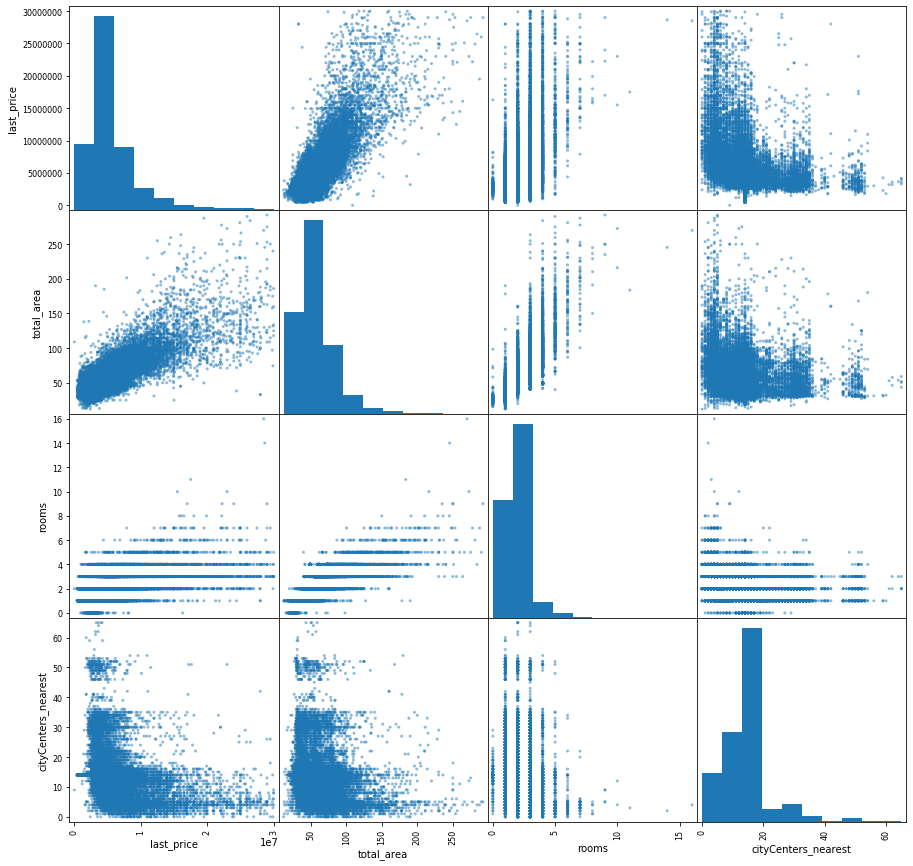

In [33]:
data_research = data[['last_price', 'total_area', 'rooms', 'flat_floor', 'cityCenters_nearest']]
data_research = data_research.query('last_price < 30000000')
data_research = data_research.query('total_area < 300')
#data_research.info()

pd.plotting.scatter_matrix(data_research, figsize=(15, 15))

In [34]:
# для учета этажности (первый, другой, последний) переводим эти занчения в цифры, 
# чтобы можно было строить графи и рассчитывать корреляцию
def flat_floor_numeric(row):
   floor = row['flat_floor']
   if floor == 'первый':
       return 1
   if floor == 'другой':
       return 5
   return 10
data_research['flat_floor_numeric'] = data_research.apply(flat_floor_numeric, axis=1)
data_research.head()

,last_price,total_area,rooms,flat_floor,cityCenters_nearest,flat_floor_numeric
0,13000000,108.0,3,другой,16,5
1,3350000,40.4,1,первый,18,1
2,5196000,56.0,2,другой,13,5
4,10000000,100.0,2,другой,8,5
5,2890000,30.4,1,другой,14,5


<div style="border:solid red 4px; padding: 20px">Для рассчета корреляции есть floor. Графики можно также стоить и по категориальным переменным (barchart-ы например). Поэтому данный шаг не нужен.</div>

<div style="border:solid red 6px; padding: 20px">Что такое barchart? Где он был описан в тренажере? То что я нашел в интернете, не подойдет сюда, так как там всего 2 оси - число и категория. Как это можно тут применить??? Я прекрасно понимаю, что задачу можно решить несколькими способами, но зачем здесь ссылаться на то, что не было дано ранее?</div>

<div style="border:solid green 4px; padding: 20px">Разве вы не строили обычные столбчатые диаграммы?</div>

In [35]:
data_research.corr()

,last_price,total_area,rooms,cityCenters_nearest,flat_floor_numeric
last_price,1.000000,0.791614,0.518512,-0.316134,0.049091
total_area,0.791614,1.000000,0.795667,-0.207539,0.046118
rooms,0.518512,0.795667,1.000000,-0.147769,0.020942
cityCenters_nearest,-0.316134,-0.207539,-0.147769,1.000000,-0.015754
flat_floor_numeric,0.049091,0.046118,0.020942,-0.015754,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb28b2780>,
      dtype=object)

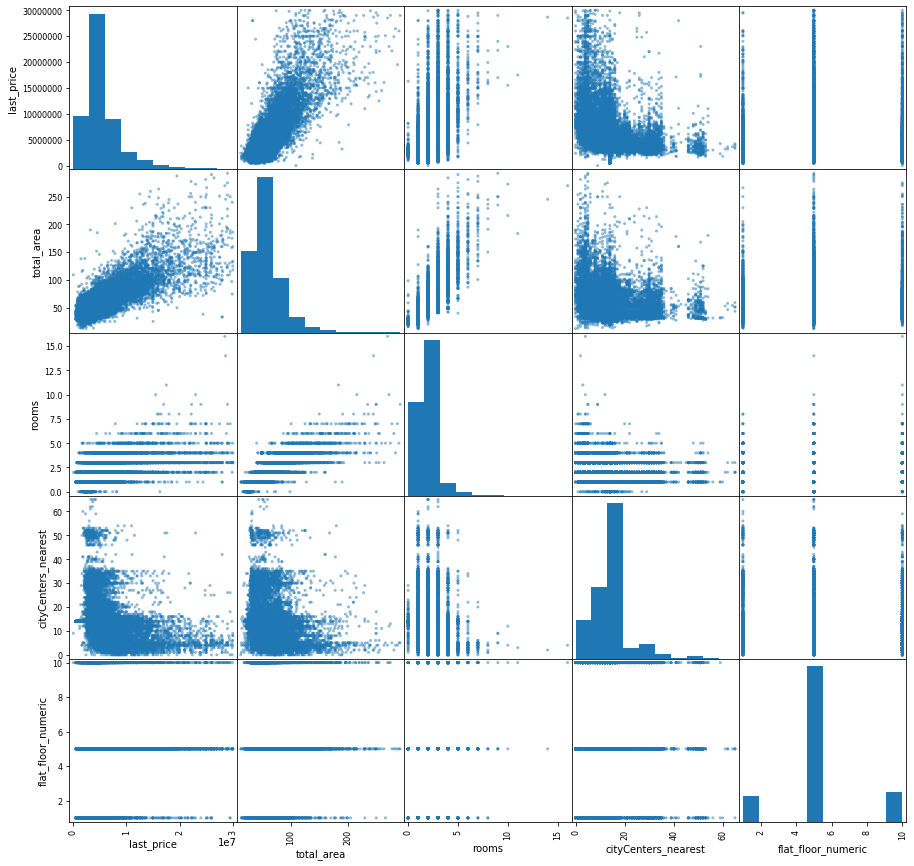

In [36]:
pd.plotting.scatter_matrix(data_research, figsize=(15, 15))

### Вывод

1. цена напрямую зависит от количества квадратов - чем больше квартира, тем дороже  
1. цена слабо зависит от количества комнат - в одном и том же диапазоне есть квартиры разной комнатости  
1. меньше всего квартир на первом этаже (где то до 15 млн много, потом заметно меньше); последний этаж представлен лучше первого - где то до 25 млн; квартира на этаже "другие" представлены во всех ценовых диапазонах - абсолютные лидеры  
1. ближе к центру есть квартиры на любой кошелек, а вот чем дальше от центра, тем сложнее найти дорогую квартиру

##### Изучим зависимость от даты размещения: дня недели, месяца и года.

In [37]:
data_research_date = data[['last_price', 'weekday', 'month', 'year']]
data_research_date.head(10)

,last_price,weekday,month,year
0,13000000,Thursday,3,2019
1,3350000,Tuesday,12,2018
2,5196000,Thursday,8,2015
3,64900000,Friday,7,2015
4,10000000,Tuesday,6,2018
5,2890000,Monday,9,2018
6,3700000,Thursday,11,2017
7,7915000,Thursday,4,2019
8,2900000,Wednesday,5,2018
9,5400000,Sunday,2,2017


In [38]:
# для работы с днями недели переведем их в числа
def weekday_to_numbers(row):
    if row['weekday'] == 'Monday':
        return 1
    if row['weekday'] == 'Tuesday':
        return 2
    if row['weekday'] == 'Wednesday':
        return 3
    if row['weekday'] == 'Thursday':
        return 4
    if row['weekday'] == 'Friday':
        return 5
    if row['weekday'] == 'Saturday':
        return 6
    return 7
    
data_research_date['weekday_to_numbers'] = data_research_date.apply(weekday_to_numbers, axis=1)
data_research_date.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,last_price,weekday,month,year,weekday_to_numbers
0,13000000,Thursday,3,2019,4
1,3350000,Tuesday,12,2018,2
2,5196000,Thursday,8,2015,4
3,64900000,Friday,7,2015,5
4,10000000,Tuesday,6,2018,2


In [39]:
data_research_date = data_research_date.query('last_price < 30000000')

In [40]:
data_research_date.corr()

,last_price,month,year,weekday_to_numbers
last_price,1.000000,0.004170,-0.040361,-0.021818
month,0.004170,1.000000,-0.269537,0.012126
year,-0.040361,-0.269537,1.000000,-0.004300
weekday_to_numbers,-0.021818,0.012126,-0.004300,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb083eef0>,
      dtype=object)

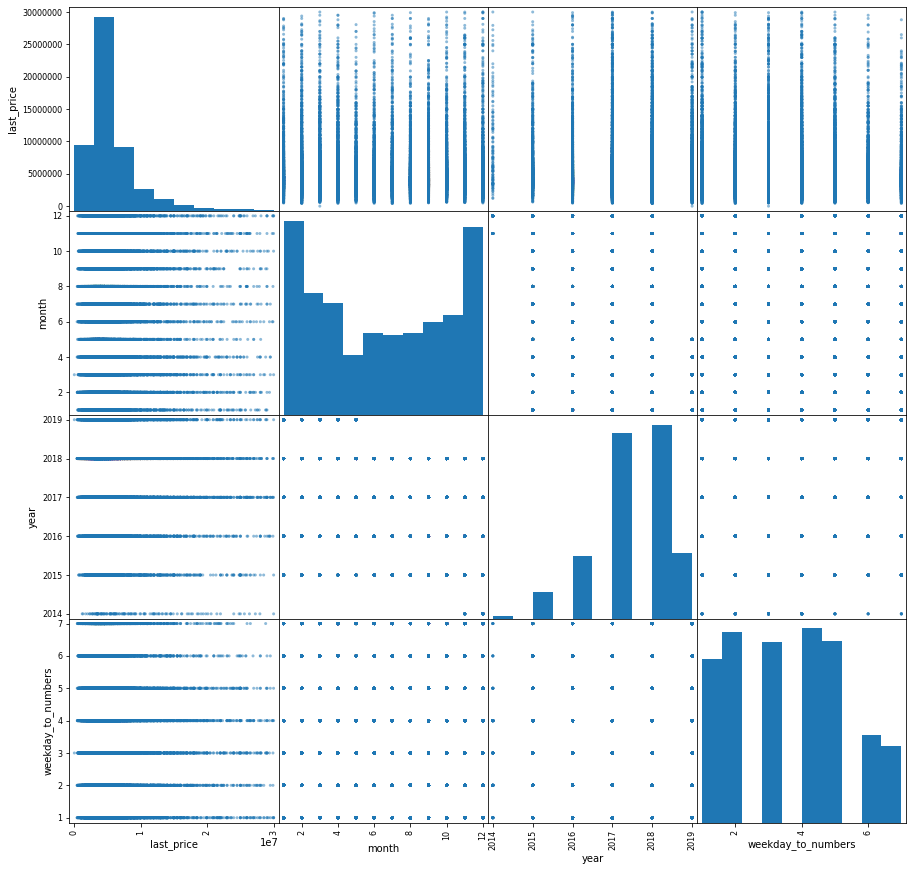

In [41]:
pd.plotting.scatter_matrix(data_research_date, figsize=(15, 15))

### Вывод

1. больше всего дешевые квартиры выставляют по субботам, самые дорогие по вторникам  
1. больше всего дешевые квартиры выставляют в мае, самые дорогие в феврале  
1. в 2014 году (до кризиса) квартиры были чаще дешевле, в 2017 году больше всего дорогих квартир было выставлено, а в 2019 опять цены пошли на спад


#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [42]:
# выбираем топ 10
top10_locality = (data
    .pivot_table(index = 'locality_name', values = 'last_price', aggfunc = ('count'))
    .sort_values('last_price', ascending = False)
    .head(10)
    )
print(top10_locality.index)
data_top10_locality = data[data['locality_name'].isin(top10_locality.index)]
data_top10_locality.head(10).T

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')


,0,1,2,3,4,6,7,8,9,10
total_images,20,7,10,0,2,6,5,20,18,5
last_price,13000000,3350000,5196000,64900000,10000000,3700000,7915000,2900000,5400000,5050000
total_area,108,40.4,56,159,100,37.3,71.6,33.16,61,39.6
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00,2017-11-02 00:00:00,2019-04-18 00:00:00,2018-05-23 00:00:00,2017-02-26 00:00:00,2017-11-16 00:00:00
rooms,3,1,2,3,2,1,2,1,3,1
ceiling_height,2.7,2.7715,2.7715,2.7715,3.03,2.7715,2.7715,2.7715,2.5,2.67
floors_total,16,11,5,14,14,26,24,27,9,12
living_area,51,18.6,34.3,34.4579,32,10.6,34.4579,15.43,43.6,20.3
floor,8,1,4,9,13,6,22,26,7,3
is_apartment,False,False,False,False,False,False,False,False,False,False


In [43]:
#считаем среднюю стоимость квадратного метра по городам
mean_price_sq_meter = data_top10_locality.groupby('locality_name')['price_of_sq_meter'].mean().sort_values(ascending = False)
mean_price_sq_meter.head(15) # проверяем что в списке только топ 10

locality_name
Санкт-Петербург      114848.565231
Пушкин               103125.373984
деревня Кудрово       92473.086957
посёлок Парголово     90175.489297
посёлок Мурино        85751.733716
посёлок Шушары        78676.904545
Колпино               75424.150888
Гатчина               68745.693811
Всеволожск            68654.007538
Выборг                58141.489451
Name: price_of_sq_meter, dtype: float64

### Вывод

Самые дорогие квартиры с СПБ, самые дешевые в Выборге (из топ 10 по количеству объявлений о продаже)

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [44]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb.head(10).T

,0,2,3,4,7,9,10,15,16,17
total_images,20,10,0,2,5,18,5,16,11,6
last_price,13000000,5196000,64900000,10000000,7915000,5400000,5050000,4650000,6700000,4180000
total_area,108,56,159,100,71.6,61,39.6,39,82,36
first_day_exposition,2019-03-07 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00,2019-04-18 00:00:00,2017-02-26 00:00:00,2017-11-16 00:00:00,2017-11-18 00:00:00,2017-11-23 00:00:00,2016-09-09 00:00:00
rooms,3,2,3,2,2,3,1,1,3,1
ceiling_height,2.7,2.7715,2.7715,3.03,2.7715,2.5,2.67,2.7715,3.05,2.7715
floors_total,16,5,14,14,24,9,12,14,5,17
living_area,51,34.3,34.4579,32,34.4579,43.6,20.3,20.5,55.6,16.5
floor,8,4,9,13,22,7,3,5,1,7
is_apartment,False,False,False,False,False,False,False,False,False,False


In [45]:
# для рассчета стоимости километра надо избавится от 0
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'].replace(0, 0.5)
data_spb.query('cityCenters_nearest == 0.5').head(10).T # проверяем, что замена сработала

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,492,660,750,1085,1104,1109,1182,1335,1351,1876
total_images,18,3,9,16,0,1,1,14,14,12
last_price,95000000,49950000,29500000,75000000,7970000,34878556,5800000,6450000,8500000,11490000
total_area,216,483.9,188.8,323,63,95.8,33.6,82,66.2,74
first_day_exposition,2017-12-05 00:00:00,2017-10-04 00:00:00,2017-03-04 00:00:00,2017-07-10 00:00:00,2018-02-09 00:00:00,2014-12-09 00:00:00,2016-03-10 00:00:00,2015-10-31 00:00:00,2019-02-27 00:00:00,2016-08-31 00:00:00
rooms,4,7,7,5,3,2,1,2,3,3
ceiling_height,3,3.2,2.7,4,2.7715,2.7715,3.7,2.7715,3.01,2.7
floors_total,5,6,2,5,5,6,7,4,4,5
living_area,86,312.5,119.3,255.7,35,58.3,22.8,40.5,37.4,45.4
floor,4,4,1,4,3,5,4,3,4,5
is_apartment,False,False,False,False,False,True,False,False,False,False


In [46]:
data_spb['price_of_km'] = data_spb['last_price']/data_spb['cityCenters_nearest']
data_spb.head(10).T

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,2,3,4,7,9,10,15,16,17
total_images,20,10,0,2,5,18,5,16,11,6
last_price,13000000,5196000,64900000,10000000,7915000,5400000,5050000,4650000,6700000,4180000
total_area,108,56,159,100,71.6,61,39.6,39,82,36
first_day_exposition,2019-03-07 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00,2019-04-18 00:00:00,2017-02-26 00:00:00,2017-11-16 00:00:00,2017-11-18 00:00:00,2017-11-23 00:00:00,2016-09-09 00:00:00
rooms,3,2,3,2,2,3,1,1,3,1
ceiling_height,2.7,2.7715,2.7715,3.03,2.7715,2.5,2.67,2.7715,3.05,2.7715
floors_total,16,5,14,14,24,9,12,14,5,17
living_area,51,34.3,34.4579,32,34.4579,43.6,20.3,20.5,55.6,16.5
floor,8,4,9,13,22,7,3,5,1,7
is_apartment,False,False,False,False,False,False,False,False,False,False


In [47]:
data_spb_mean_price_of_km = data_spb['price_of_km'].mean()
print(data_spb_mean_price_of_km)

1692176.6908685432


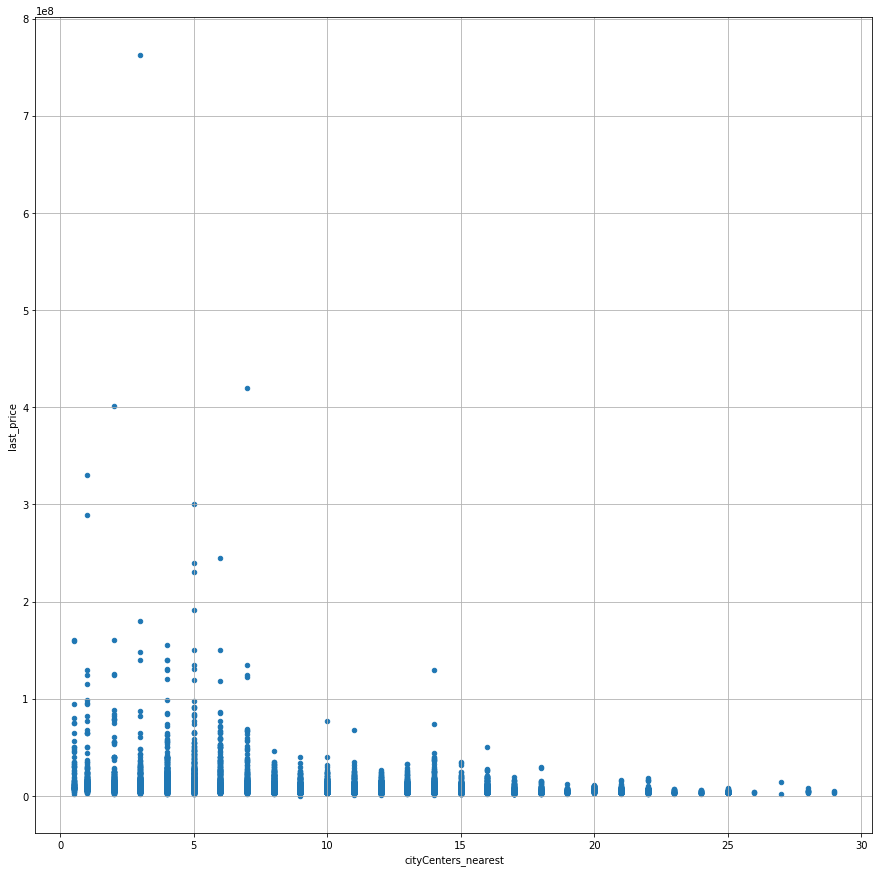

In [48]:
data_spb.plot(x = 'cityCenters_nearest', y = 'last_price',  kind='scatter', grid = True, figsize = (15, 15))

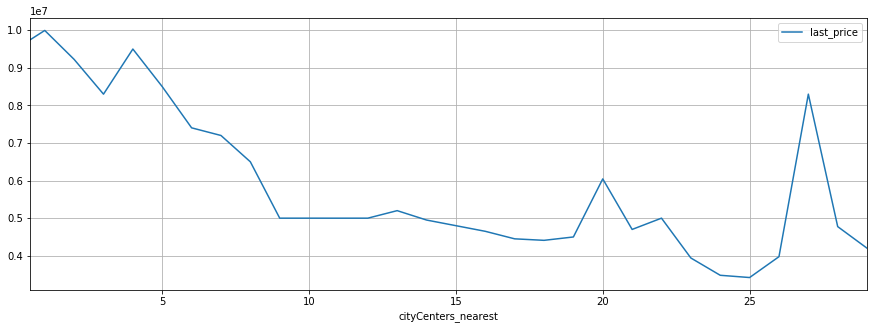

In [49]:
#data_spb.plot(x = 'cityCenters_nearest', y = 'last_price',  kind='scatter', grid = True, figsize = (15, 15))
(data_spb
         .query('last_price < 30000000')
         .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
         .plot(grid=True , figsize=(15, 5))
);

<div style="border:solid #ebd731; 4px; padding: 20px">Это точно наиболее удачный тип графика? И размер.</div>

Можно использовать pivot_table

В таком случае центр считаем до 9 км

<div style="border:solid green 4px; padding: 20px">Хорошо.</div>

### Вывод

##### Центральной зоной города можно считать область радиусом `6,7` км от центра. Далее цены резко снижаются

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

         last_price   total_area        rooms        floor  ceiling_height  \
count  4.100000e+03  4100.000000  4100.000000  4100.000000     4100.000000   
mean   9.912405e+06    79.601449     2.608537     4.422683        2.933601   
std    5.523936e+06    38.803740     1.288255     3.273963        0.305377   
min    1.600000e+06    12.000000     0.000000     1.000000        2.000000   
25%    6.000000e+06    51.390000     2.000000     2.000000        2.771499   
50%    8.400000e+06    72.000000     2.000000     4.000000        2.771499   
75%    1.200000e+07    97.000000     3.000000     5.000000        3.090000   
max    2.999900e+07   363.000000    16.000000    25.000000        5.800000   

       cityCenters_nearest        month         year  
count           4100.00000  4100.000000  4100.000000  
mean               4.81878     6.428780  2017.204634  
std                2.11711     3.443696     1.116021  
min                0.00000     1.000000  2014.000000  
25%                3.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb01d57b8>,
      dtype=object)

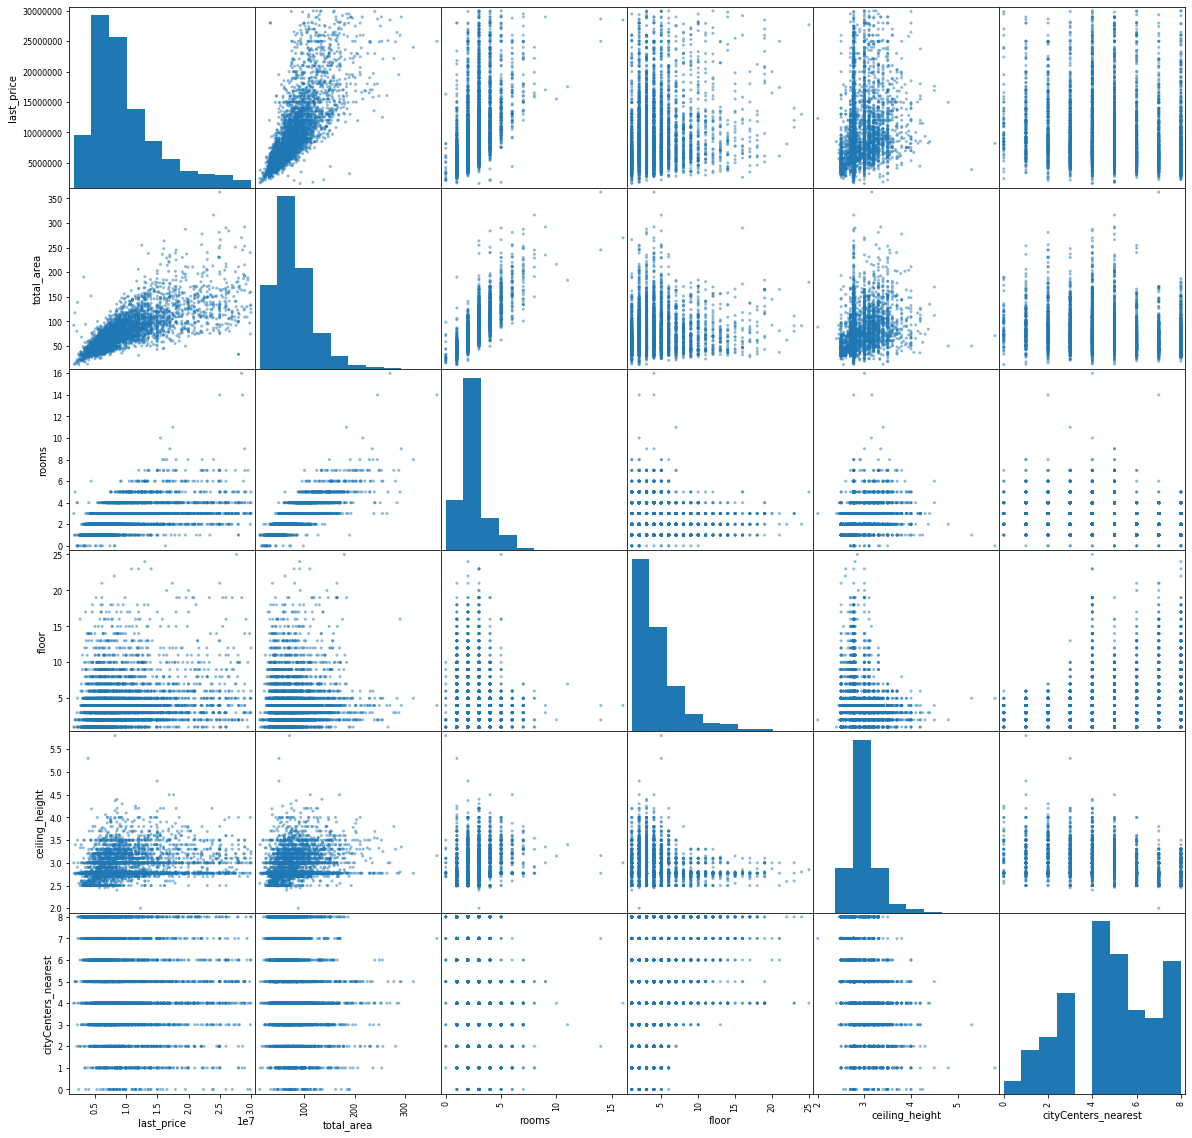

In [50]:
data_research = (data
    [['last_price'
      , 'total_area'
      , 'rooms'
      , 'floor'
      , 'ceiling_height'
      , 'cityCenters_nearest'
      , 'month'
      , 'year']]
                )
data_research = data_research.query('cityCenters_nearest < 9') #меняем 7 км на 9 км
data_research = data_research.query('ceiling_height < 10')
data_research = data_research.query('last_price < 3.00000e+07')
data_research = data_research.query('total_area < 441.980000')
#data_research['weekday_to_numbers'] = data_research_date['weekday_to_numbers']
print(data_research.describe())

data_research_no_date = (data_research
    [['last_price'
      , 'total_area'
      , 'rooms'
      , 'floor'
      , 'ceiling_height'
      , 'cityCenters_nearest']]
                )

pd.plotting.scatter_matrix(data_research_no_date, figsize=(20, 20))

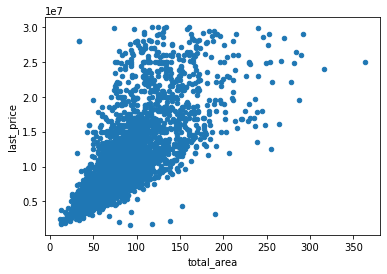

In [51]:
data_research.plot(x = 'total_area', y = 'last_price', kind = 'scatter')

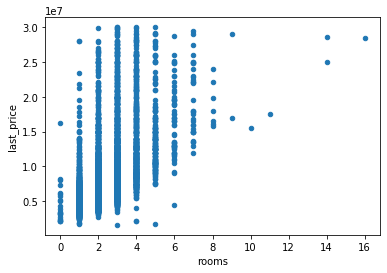

In [52]:
data_research.plot(x = 'rooms', y = 'last_price', kind = 'scatter')

<div style="border:solid #ebd731; 4px; padding: 20px">Напрашивается агрегировать по количеству комнат и изобразить barchart-ом. Ниже - похожие случаи.</div>

<div style="border:solid red 6px; padding: 20px"> Тот же вопрос - Что такое barchart? Чем он лучше того, что я здесь использовал? </div>

<div style="border:solid green 4px; padding: 20px">Смотри, у тебя ось rooms - дискретная, то есть положение точек строго фиксированное. У тебя сейчас сложно понять реальную плотность точек. Можно агрегировать значение по каждой комнате и отрисовать столбцами. Это будет показательный вариант визуализации. Пример ниже.</div>

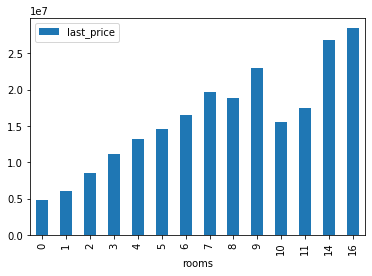

In [53]:
data_research.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

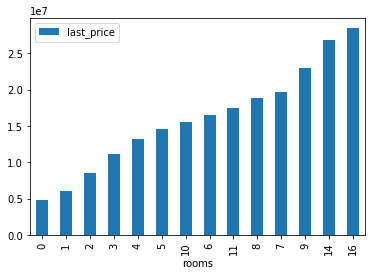

In [54]:
data_research.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').sort_values('last_price').plot(kind = 'bar')

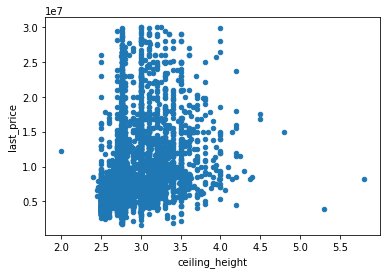

In [55]:
data_research.plot(x = 'ceiling_height', y = 'last_price', kind = 'scatter')

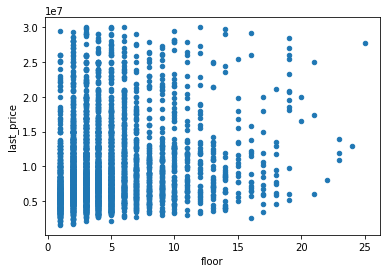

In [56]:
data_research.plot(x = 'floor', y = 'last_price', kind = 'scatter')

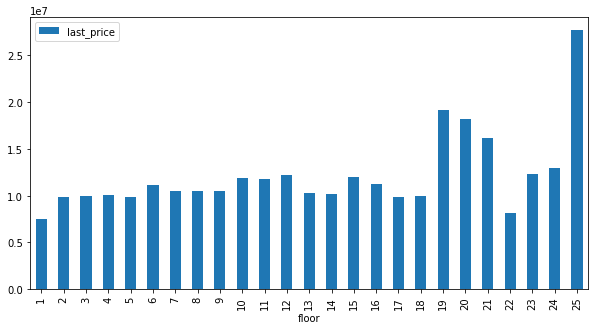

In [57]:
data_research.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar', figsize=(10,5))

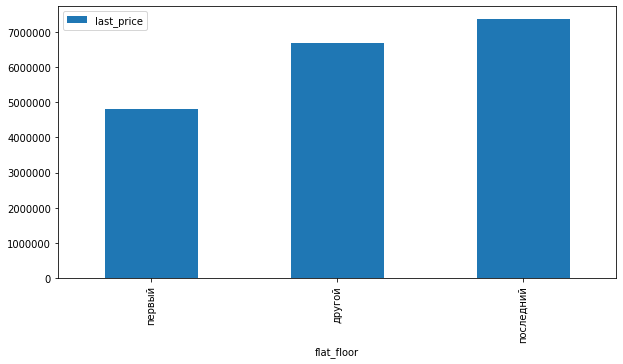

In [73]:
data.pivot_table(index = 'flat_floor', values = 'last_price', aggfunc = 'mean').sort_values('last_price').plot(kind = 'bar', figsize=(10,5))

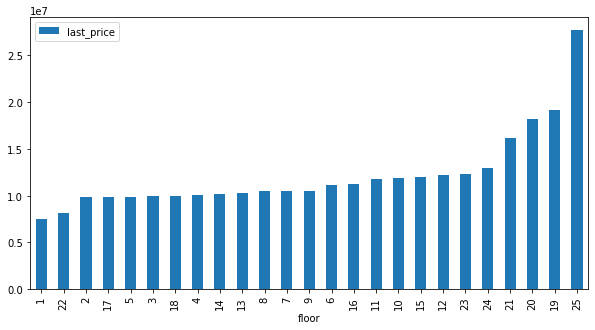

In [60]:
data_research.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'mean').sort_values('last_price').plot(kind = 'bar', figsize=(10,5))

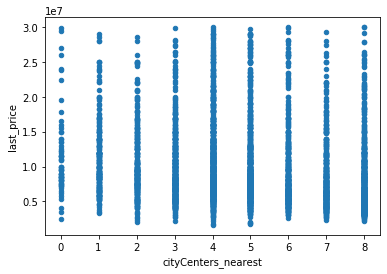

In [61]:
data_research.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter')

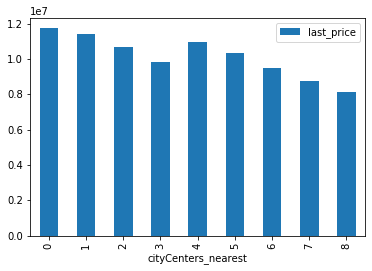

In [62]:
data_research.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

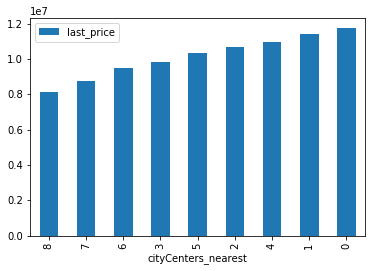

In [63]:
data_research.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean').sort_values('last_price').plot(kind = 'bar')

In [64]:
data_research_date.head()

#data_research['weekday_to_numbers'] = data_research_date['weekday_to_numbers']


,last_price,weekday,month,year,weekday_to_numbers
0,13000000,Thursday,3,2019,4
1,3350000,Tuesday,12,2018,2
2,5196000,Thursday,8,2015,4
4,10000000,Tuesday,6,2018,2
5,2890000,Monday,9,2018,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9faf22ada0>,
      dtype=object)

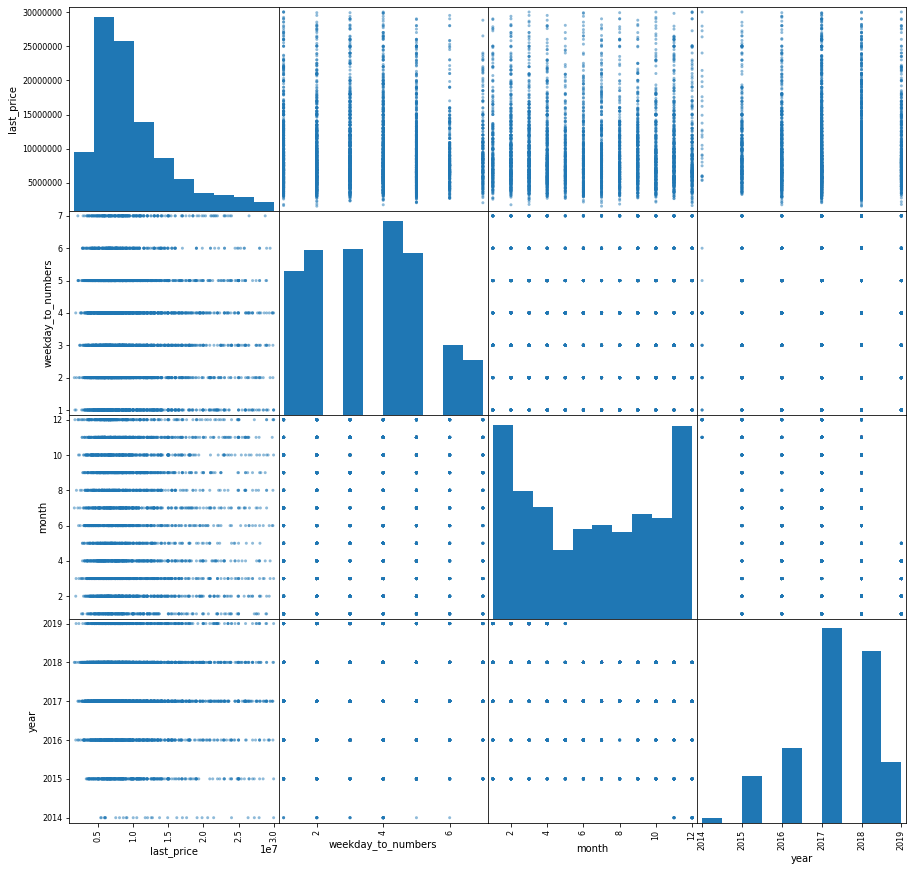

In [65]:
data_research['weekday_to_numbers'] = data_research_date['weekday_to_numbers']
data_research_dating = data_research[['last_price', 'weekday_to_numbers', 'month', 'year']]
pd.plotting.scatter_matrix(data_research_dating, figsize=(15, 15))

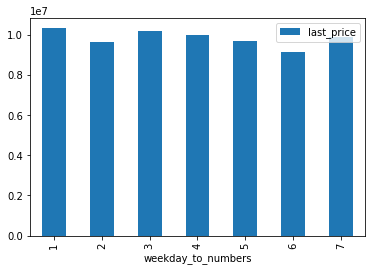

In [66]:
data_research_dating.pivot_table(index = 'weekday_to_numbers', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

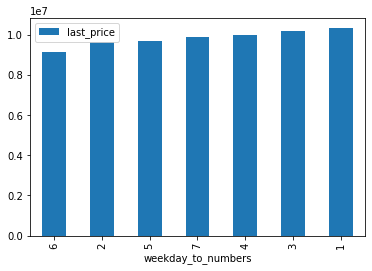

In [67]:
data_research_dating.pivot_table(index = 'weekday_to_numbers', values = 'last_price', aggfunc = 'mean').sort_values('last_price').plot(kind = 'bar')

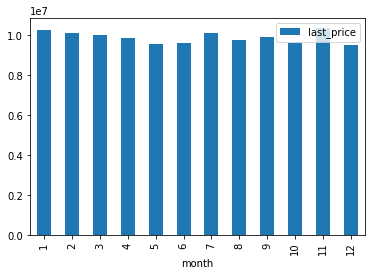

In [68]:
data_research_dating.pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

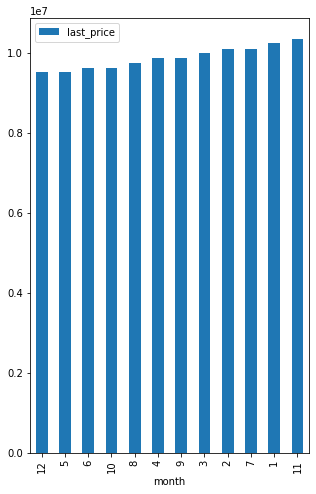

In [85]:
(data_research_dating
    .pivot_table(index = 'month', values = 'last_price')
    .sort_values('last_price')
    .plot(kind = 'bar', figsize=(5,8))
)

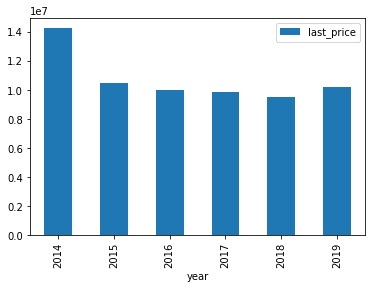

In [70]:
data_research_dating.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').plot(kind = 'bar')

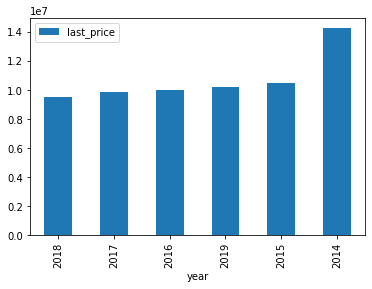

In [71]:
data_research_dating.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').sort_values('last_price').plot(kind = 'bar')

### Вывод

1. Количество этажей в самом центре (до 3-х км) редко превышает 7 этажей (в центре нельзя строить высотные дома)  
1. Площадь квартир растёт с удалением от центра  
1. Высота потолков в центре выше, чем на границе центральной зоны  
1. Больше всего предложений о продаже на расстоянии около 4-х км от центра  
1. В целом чем ближе к центру тем дороже. `Однако на расстоянии 4 км есть небольшой пик по стоимости и он выше чем на 2-х км. На расстоянии 3-х км можно купить относительно дешевые квартиры по центру`
1. Чем выше этаж, тем меньше комнат  
1. Чем ниже дом, тем выше потолки  
1. Чем больше число комнат, тем дороже квартира. `При этом 9 комнат оказались почти самыми дорогими (!) - дороже 10 и 11, а 10 комнат дешевле 7` 
1. Самые дешевые квартиры на первом этаже, самые дорогие на последнем 
1. Больше всего дешевые квартиры выставляют по субботам, самые дорогие по воскресниям  
1. Больше всего дешевые квартиры выставляют в декабре, самые дорогие в ноябре  
1. В 2014 году (до кризиса) квартиры были дороже, в 2018 году юили самые дешевые

### Шаг 5. Общий вывод

### Центр города отличается от остальной части города:  
1. В центре есть зависимость цены от кол-ва комнат  
1. Количество этажей в самом центре (до 3-х км) редко превышает 7 этажей (в центре нельзя строить высотные дома)  
1. Площадь квартир растёт с удалением от центра  
1. Высота потолков в центре выше, чем на границе центральной зоны  
1. Больше всего предложений о продаже на расстоянии около 4-х км от центра  
1. Чем выше этаж, тем меньше комнат  
1. Чем ниже дом, тем выше потолки  
1. Чем выше этаж, тем больше дешевых квартир  
1. Больше всего дешевые квартиры выставляют по субботам, самые дорогие по средам  
1. Больше всего дешевые квартиры выставляют в декабре, самые дорогие в марте  
1. Цены не сильно зависят от расстояния до центрв

### В остальном обе части города похожи:  
1. Стоимость зависит от площади 
1. в 2014 году (до кризиса) квартиры были чаще дешевле, в 2017 году больше всего дорогих квартир было выставлено, а в 2019 опять цены пошли на спад

<div style="border:solid green 4px; padding: 20px">Внеси указанные доработки, и, возможно в итоге нужно будет внести мелкие коррективы в выводы. Работа уже проделана большая, успехов, жду!</div>

<div style="border:solid purple 4px; padding: 20px">Скорректировал данные по границе центра с 7 км до 9 км. Остальные выводы вроде не поменялись...</div>

<div style="border:solid green 4px; padding: 20px">Попробуй все таки изменить графики. Нужно уметь пользоваться документацией, общие вопросы задавай в Slack-е. Удачи!</div>

In [ ]:
<div style="border:solid purple 4px; padding: 20px">Скорректировал данные по границе центра с 7 км до 9 км. Остальные выводы вроде не поменялись...</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод